In [1]:
import os
import math
import tensorflow as tf
import glob
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models,layers,optimizers,datasets
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
import os

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(validation_split=0.2, preprocessing_function=preprocess_input)
train_flow = train_gen.flow_from_directory("./data_resized/train/", target_size=(256, 256), batch_size=130, subset="training")
valid_flow = train_gen.flow_from_directory("./data_resized/val/", target_size=(256, 256), batch_size=130, subset="validation")

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet_v2 import ResNet152V2 

# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout, Dense
from keras.models import Model


res = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3)) 

for layer in res.layers: 
  layer.trainable = False

x = res.output 
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(3, activation='softmax')(x)

model = Model(res.input, x) 
opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001 ,
    rho=0.8,
    momentum=0.2,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 

model.summary() 

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [4]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint = ModelCheckpoint(
     'model_inception_v3.h5', 
     monitor='loss', 
     verbose=1, 
     save_best_only=True, 
     mode='min', 
     period=1
)

In [5]:
history = model.fit_generator(train_flow, epochs=10, validation_data=valid_flow, callbacks = checkpoint)

C:\Users\admin\AppData\Local\Temp\ipykernel_8376\2718115790.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_flow, epochs=10, validation_data=valid_flow, callbacks = checkpoint)


Epoch 1/10
2888/2888 [==============================] - ETA: 0s - loss: 1.0476 - accuracy: 0.4727
Epoch 1: loss improved from inf to 1.04757, saving model to model_inception_v3.h5
2888/2888 [==============================] - 2817s 973ms/step - loss: 1.0476 - accuracy: 0.4727 - val_loss: 0.9950 - val_accuracy: 0.4950
Epoch 2/10
2888/2888 [==============================] - ETA: 0s - loss: 0.9781 - accuracy: 0.5106
Epoch 2: loss improved from 1.04757 to 0.97805, saving model to model_inception_v3.h5
2888/2888 [==============================] - 2425s 840ms/step - loss: 0.9781 - accuracy: 0.5106 - val_loss: 0.9766 - val_accuracy: 0.5146
Epoch 3/10
2888/2888 [==============================] - ETA: 0s - loss: 0.9560 - accuracy: 0.5273
Epoch 3: loss improved from 0.97805 to 0.95596, saving model to model_inception_v3.h5
2888/2888 [==============================] - 1749s 606ms/step - loss: 0.9560 - accuracy: 0.5273 - val_loss: 0.9590 - val_accuracy: 0.5284
Epoch 4/10
2888/2888 [================

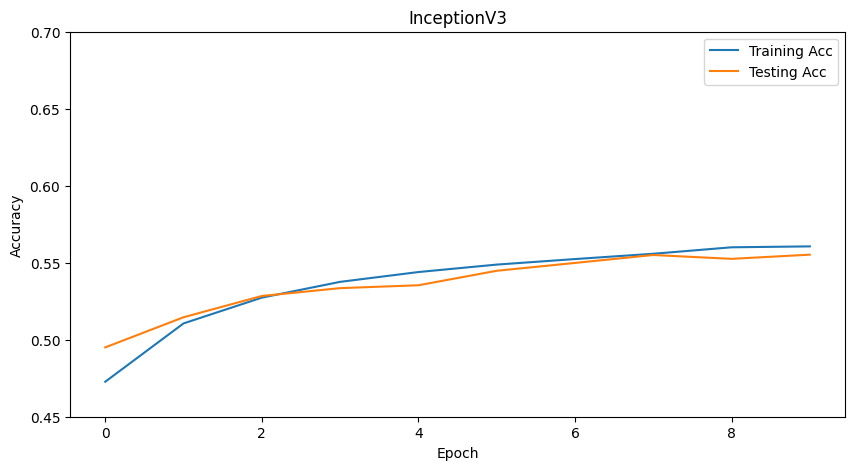

In [6]:
plt.figure(figsize=(10,5))
plt.title("InceptionV3")
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'],label='Testing Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.45,0.7])
plt.legend()
plt.savefig('inceptionNetv3_balance.png', dpi=300, bbox_inches='tight')